# Example BIDS Demo

### Stream Initialization

In [1]:
import py_neuromodulation as pn
from py_neuromodulation import nm_BidsStream, nm_analysis
from sklearn import linear_model, metrics, model_selection
import os

In [2]:
PATH_BIDS = os.path.join(pn.__path__[0], "..", "examples", "data")
PATH_RUN = os.path.join(
    PATH_BIDS,
    "sub-testsub",
    "ses-EphysMedOff",
    "ieeg",
    "sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr"
)
PATH_OUT = os.path.join(
    PATH_BIDS,
    'derivatives'
)

In [3]:
pn_stream = nm_BidsStream.BidsStream(
    PATH_RUN=PATH_RUN,
    PATH_BIDS=PATH_BIDS,
    PATH_OUT=PATH_OUT
)

Extracting parameters from c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame MNI152NLin2009bAsym: None.
Reading electrode coords from c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['ECOG_L_1_SMC_AT', 'ECOG_L_2_SMC_AT', 'ECOG_L_3_SMC_AT', 'ECOG_L_4_SMC_AT', 'ECOG_L_5_SMC_AT', 'ECOG_L_6_SMC_AT', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_L_1_STN_BS', 'LFP_L_234_STN_BS', 'LFP_L_567_STN_BS', 'LFP_R_234_STN_BS'

c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:41: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-buttonpress_run-0.

The search_str was "c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\sub-testsub\**\sub-testsub_ses-EphysMedOff*events.tsv"
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:41: RuntimeWarning: iEEG Coordinate frame MNI152NLin2009bAsym is not a readable BIDS keyword by mne-bids yet. The allowed keywords are: ['ACPC', 'Pixels', 'Other']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:41: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw_arr = mne_bids.read_raw_bids(bids_path)
c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\nm_IO.py:41: Runt

In [4]:
pn_stream.nm_channels

name       rereference  used  target  type status  \
0   ANALOG_R_ROTA_CH              None     0       0  misc   good   
1    ECOG_L_1_SMC_AT           average     1       0  ecog   good   
2    ECOG_L_2_SMC_AT           average     1       0  ecog   good   
3    ECOG_L_3_SMC_AT           average     1       0  ecog   good   
4    ECOG_L_4_SMC_AT           average     1       0  ecog   good   
5    ECOG_L_5_SMC_AT           average     1       0  ecog   good   
6    ECOG_L_6_SMC_AT           average     1       0  ecog   good   
7             EEG_AO              None     0       0  misc   good   
8     LFP_L_1_STN_BS  LFP_L_567_STN_BS     1       0  seeg   good   
9   LFP_L_234_STN_BS    LFP_L_1_STN_BS     1       0  seeg   good   
10  LFP_L_567_STN_BS  LFP_L_234_STN_BS     1       0  seeg   good   
11  LFP_R_234_STN_BS  LFP_R_567_STN_BS     1       0  seeg   good   
12  LFP_R_567_STN_BS  LFP_R_234_STN_BS     1       0  seeg   good   
13  SQUARED_ARTIFACT              None     0       0  misc   good   
14  SQUARED_ROTATION              None     0       1  misc   good   

                             new_name  
0                    ANALOG_R_ROTA_CH  
1              ECOG_L_1_SMC_AT-avgref  
2              ECOG_L_2_SMC_AT-avgref  
3              ECOG_L_3_SMC_AT-avgref  
4              ECOG_L_4_SMC_AT-avgref  
5              ECOG_L_5_SMC_AT-avgref  
6              ECOG_L_6_SMC_AT-avgref  
7                              EEG_AO  
8     LFP_L_1_STN_BS-LFP_L_567_STN_BS  
9     LFP_L_234_STN_BS-LFP_L_1_STN_BS  
10  LFP_L_567_STN_BS-LFP_L_234_STN_BS  
11  LFP_R_234_STN_BS-LFP_R_567_STN_BS  
12  LFP_R_567_STN_BS-LFP_R_234_STN_BS  
13                   SQUARED_ARTIFACT  
14                   SQUARED_ROTATION

In [5]:
pn_stream.settings

{'out_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\rt_example',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': True,
  'feature_normalization': False,
  'kalman_filter': True,
  're_referencing': True,
  'notch_filter': True,
  'bandpass_filter': False,
  'stft': True,
  'fft': False,
  'raw_hjorth': True,
  'sharpwave_analysis': True,
  'return_raw': True,
  'project_cortex': True,
  'project_subcortex': True,
  'coherence': False},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['theta',
   'alpha',
   'low beta',
   'high beta',
   'low gamma',
   'high gamma',
   'HFA']},
 'stft_settings': {'windowl

### Run

In [6]:
pn_stream.run_bids()

No Error occurred when testing the settings.
No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 7.50 Hz
- Upper transition bandwidth: 7.50 Hz
- Filter length: 999 samples (0.999 sec)

Last batch took: 0.06 seconds
1.0 seconds of data processed
Last batch took: 0.06 seconds
1.1 seconds of data processed
Last batch took: 0.05 seconds
1.2 seconds of data processed
Last batch took: 0.05 seconds
1.3 seconds of data processed
Last batch took: 0.05 seconds
1.4 seconds of data processed
Last batch took: 0.05 seconds
1.5 seconds of data processed
Last batch took: 0.05 seconds
1.6 seconds of data processed
Last batch took: 0.05 seconds
1.7 seconds of 

### Feature Processing

In [7]:
pn_stream.feature_arr

ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity  \
0                                   554.538409   
1                                     1.059828   
2                                     0.982879   
3                                     0.919786   
4                                     0.927484   
..                                         ...   
165                                   0.892800   
166                                   1.061693   
167                                   1.034944   
168                                   1.318260   
169                                   1.583638   

     ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility  \
0                                     0.119505   
1                                     0.119057   
2                                     0.123628   
3                                     0.122545   
4                                     0.122931   
..                                         ...   
165                                   0.161343   
166                                   0.149959   
167                                   0.149457   
168                                   0.134678   
169                                   0.118045   

     ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity  ECOG_L_1_SMC_AT-avgref_raw  \
0                                      10.325938                  -16.160959   
1                                      10.229641                   -1.171990   
2                                       9.881081                   -1.060725   
3                                      10.521164                   -0.586948   
4                                      10.456782                   -0.670646   
..                                           ...                         ...   
165                                     7.270958                   -1.445519   
166                                     7.668662                    2.597551   
167                                     7.924312                   -0.434982   
168                                     8.517726                    1.207046   
169                                    10.232425                   -1.675648   

     ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_prominence  \
0                                          22.878252   
1                                           2.303461   
2                                           1.169823   
3                                           0.585446   
4                                           1.162251   
..                                               ...   
165                                         1.463549   
166                                         3.788780   
167                                         1.994286   
168                                         2.514825   
169                                         2.031028   

     ECOG_L_1_SMC_AT-avgref_Sharpwave_Mean_interval  \
0                                         18.666667   
1                                         27.166667   
2                                         15.916667   
3                                         13.200000   
4                                         15.250000   
..                                              ...   
165                                        7.500000   
166                                       11.250000   
167                                       11.000000   
168                                       24.250000   
169                                        0.000000   

     ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_sharpness  \
0                                         -0.211145   
1                                         -0.071466   
2                                         -0.029324   
3                                         -0.054938   
4                                         -0.116413   
..                                              ...   
165                                       -0.015120   
166                                       -0.128247   
167          

In [8]:
pn_stream.feature_arr.describe()

ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity  \
count                                 170.000000   
mean                                    4.044785   
std                                    42.472001   
min                                     0.232081   
25%                                     0.522598   
50%                                     0.712293   
75%                                     1.040121   
max                                   554.538409   

       ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility  \
count                                 170.000000   
mean                                    0.168564   
std                                     0.029737   
min                                     0.115677   
25%                                     0.147553   
50%                                     0.168335   
75%                                     0.184055   
max                                     0.265573   

       ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity  \
count                                   170.000000   
mean                                      7.803587   
std                                       1.131282   
min                                       5.212218   
25%                                       7.129153   
50%                                       7.735721   
75%                                       8.392744   
max                                      10.720111   

       ECOG_L_1_SMC_AT-avgref_raw  \
count                  170.000000   
mean                    -0.000469   
std                      1.615618   
min                    -16.160959   
25%                     -0.635239   
50%                      0.087067   
75%                      0.699279   
max                      2.915206   

       ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_prominence  \
count                                       170.000000   
mean                                          1.806865   
std                                           1.868650   
min                                           0.377825   
25%                                           0.951442   
50%                                           1.458018   
75%                                           2.262552   
max                                          22.878252   

       ECOG_L_1_SMC_AT-avgref_Sharpwave_Mean_interval  \
count                                      170.000000   
mean                                        13.310882   
std                                          5.869131   
min                                          0.000000   
25%                                         10.000000   
50%                                         13.229167   
75%                                         16.739583   
max                                         31.500000   

       ECOG_L_1_SMC_AT-avgref_Sharpwave_Max_sharpness  \
count                                      170.000000   
mean                                        -0.110371   
std                                          0.079682   
min                                         -0.385672   
25%                                         -0.155592   
50%                                         -0.092700   
75%                                         -0.054814   
max                                          0.026056   

       ECOG_L_1_SMC_AT-avgref_stft_theta  ECOG_L_1_SMC_AT-avgref_stft_alpha  \
count                         170.000000                         170.000000   
mean                           -1.682028                          -1.578020   
std                             0.604216                           0.589512   
min                            -2.629123                          -2.598815   
25%                            -2.079638                          -1.957509   
50%                            -1.772117                          -1.680460   
75%                            -1.464041                          -1.357252   
max                             0.587672                         

In [9]:
file_name = os.path.basename(PATH_RUN)
file_name

'sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr'

In [10]:
feature_reader = nm_analysis.Feature_Reader(
        feature_dir=PATH_OUT,
        feature_file=file_name
)

In [11]:
ch = "ECOG_L_1_SMC_AT-avgref"
list_feature_keywords = ["stft"]

Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\MOV_aligned_features_ch_ECOG_L_1_SMC_AT-avgref_stft.png


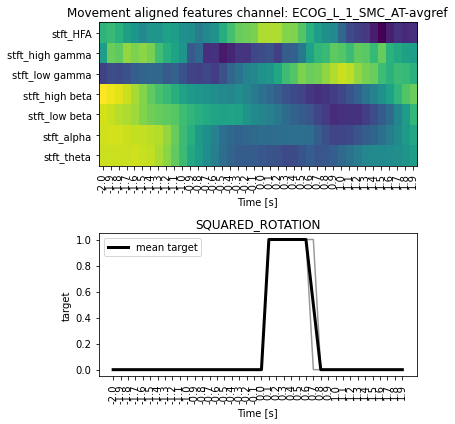

In [12]:
feature_reader.plot_target_averaged_channel(
        ch=ch,
        list_feature_keywords=list_feature_keywords,
        epoch_len=4,
        threshold=0.5
    )

In [13]:
 model = linear_model.LogisticRegression(class_weight='balanced')

In [14]:
feature_reader.feature_arr.shape

(170, 422)

In [15]:
feature_reader.set_decoder(
        model = model,
        eval_method=metrics.balanced_accuracy_score,
        cv_method=model_selection.KFold(n_splits=3, shuffle=True),
        get_movement_detection_rate=True,
        min_consequent_count=2
    )

In [16]:
performances = feature_reader.run_ML_model(
        estimate_channels=True,
        estimate_gridpoints=True,
        estimate_all_channels_combined=False,
        save_results=True
    )

C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

no movements in label


C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

no movements in label


C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

model being saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_LM_ML_RES.p


Feature epoch average figure saved to: c:\Users\ICN_admin\Documents\py_neuromodulation\py_neuromodulation\..\examples\data\derivatives\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg\PLOT_CORTEX_ch_performance_allch_allgrid.png


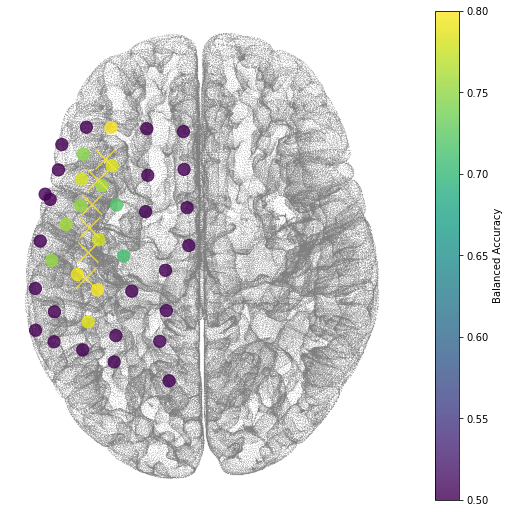

In [17]:
feature_reader.plot_subject_grid_ch_performance(performance_dict=performances, plt_grid=True)